<a href="https://colab.research.google.com/github/DOOryUniverse/News-articles-through-text-sentiment-analysis/blob/master/%ED%85%8C%EC%8A%AC%EB%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import numpy as np
import pandas as pd
import nltk 
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer


In [ ]:
url = 'https://newsapi.org/v2/everything?'
api_key = 'abf762bd85274b57ab79bdedd59cc50b'

In [ ]:

def get_articles(file): 
    article_results = [] 
    for i in range(len(file)):
        article_dict = {}
        article_dict['title'] = file[i]['title']
        article_dict['author'] = file[i]['author']
        article_dict['source'] = file[i]['source']
        article_dict['description'] = file[i]['description']
        article_dict['content'] = file[i]['content']
        article_dict['pub_date'] = file[i]['publishedAt']
        article_dict['url'] = file[i]["url"]
        article_dict['photo_url'] = file[i]['urlToImage']
        article_results.append(article_dict)
    return article_results

In [ ]:

parameters_headlines = {
    'q': 'Tesla',
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': api_key,
    'language': 'en',
    'from' : '2021-03-10'    
}
 
response_headline = requests.get(url, params = parameters_headlines)
response_json_headline = response_headline.json()
responses = response_json_headline['articles']

news_articles_df = pd.DataFrame(get_articles(responses))

news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url
0,"Your Job Title Is Meaningless, So Share This I...",Sam Blum,"{'id': None, 'name': 'Lifehacker.com'}",Newly minted world’s richest man Elon Musk has...,Newly minted worlds richest man Elon Musk has ...,2021-03-15T21:00:00Z,https://lifehacker.com/your-job-title-is-meani...,https://i.kinja-img.com/gawker-media/image/upl...
1,Tesla now accepts Bitcoin in the US,https://www.engadget.com/about/editors/steve-dent,"{'id': 'engadget', 'name': 'Engadget'}","As it promised earlier this year, Tesla now ac...","As it promised earlier this year, Tesla now ac...",2021-03-24T08:29:16Z,https://www.engadget.com/tesla-will-soon-let-y...,https://s.yimg.com/os/creatr-uploaded-images/2...
2,Tesla factory reported hundreds of COVID-19 ca...,https://www.engadget.com/about/editors/jon-fingas,"{'id': 'engadget', 'name': 'Engadget'}",Tesla reported hundreds of COVID-19 cases at i...,Tesla's determination to restart EV production...,2021-03-13T20:05:15Z,https://www.engadget.com/tesla-fremont-factory...,https://s.yimg.com/uu/api/res/1.2/W3l158KPAI0d...
3,Tesla customers say they've been double-charge...,https://www.engadget.com/about/editors/steve-dent,"{'id': 'engadget', 'name': 'Engadget'}",Tesla buyers have been reporting that they've ...,Finding an extra $10 charge on your groceries ...,2021-03-30T08:25:15Z,https://www.engadget.com/telsa-customers-doubl...,https://s.yimg.com/os/creatr-uploaded-images/2...
4,Tesla offers 50 percent discounts on overnight...,https://www.engadget.com/about/editors/mariell...,"{'id': 'engadget', 'name': 'Engadget'}",Tesla is giving California owners a 50 percent...,Tesla is giving owners in California a sweet i...,2021-04-07T10:53:11Z,https://www.engadget.com/tesla-50-percent-disc...,https://s.yimg.com/os/creatr-uploaded-images/2...


In [ ]:
responses = list() # stores responses for various news sources
domains = ['wsj.com','aljazeera.com','bbc.co.uk','techcrunch.com', 'nytimes.com','bloomberg.com','businessinsider.com',
             'cbc.ca','cnbc.com','cnn.com','ew.com','espn.go.com','espncricinfo.com','foxnews.com', 'apnews.com',
             'news.nationalgeographic.com','nymag.com','reuters.com','rte.ie','thehindu.com','huffingtonpost.com',
             'irishtimes.com','timesofindia.indiatimes.com','washingtonpost.com','time.com','medicalnewstoday.com',
             'ndtv.com','theguardian.com','dailymail.co.uk','firstpost.com','thejournal.ie', 'hindustantimes.com',
             'economist.com','news.vice.com','usatoday.com','telegraph.co.uk','metro.co.uk','mirror.co.uk','news.google.com']
for domain in domains:
    parameters_headlines = {
    'domains':format(domain),
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': api_key,
    'language': 'en',
    'from' : '2021-03-10'    
    }
    rr = requests.get(url, params = parameters_headlines)
    data = rr.json()
    responses = data["articles"]
    news_articles_df=news_articles_df.append(pd.DataFrame(get_articles(responses)))

In [ ]:
print(news_articles_df.shape)
news_articles_df.head()

(2912, 8)


,title,author,source,description,content,pub_date,url,photo_url
0,"Your Job Title Is Meaningless, So Share This I...",Sam Blum,"{'id': None, 'name': 'Lifehacker.com'}",Newly minted world’s richest man Elon Musk has...,Newly minted worlds richest man Elon Musk has ...,2021-03-15T21:00:00Z,https://lifehacker.com/your-job-title-is-meani...,https://i.kinja-img.com/gawker-media/image/upl...
1,Tesla now accepts Bitcoin in the US,https://www.engadget.com/about/editors/steve-dent,"{'id': 'engadget', 'name': 'Engadget'}","As it promised earlier this year, Tesla now ac...","As it promised earlier this year, Tesla now ac...",2021-03-24T08:29:16Z,https://www.engadget.com/tesla-will-soon-let-y...,https://s.yimg.com/os/creatr-uploaded-images/2...
2,Tesla factory reported hundreds of COVID-19 ca...,https://www.engadget.com/about/editors/jon-fingas,"{'id': 'engadget', 'name': 'Engadget'}",Tesla reported hundreds of COVID-19 cases at i...,Tesla's determination to restart EV production...,2021-03-13T20:05:15Z,https://www.engadget.com/tesla-fremont-factory...,https://s.yimg.com/uu/api/res/1.2/W3l158KPAI0d...
3,Tesla customers say they've been double-charge...,https://www.engadget.com/about/editors/steve-dent,"{'id': 'engadget', 'name': 'Engadget'}",Tesla buyers have been reporting that they've ...,Finding an extra $10 charge on your groceries ...,2021-03-30T08:25:15Z,https://www.engadget.com/telsa-customers-doubl...,https://s.yimg.com/os/creatr-uploaded-images/2...
4,Tesla offers 50 percent discounts on overnight...,https://www.engadget.com/about/editors/mariell...,"{'id': 'engadget', 'name': 'Engadget'}",Tesla is giving California owners a 50 percent...,Tesla is giving owners in California a sweet i...,2021-04-07T10:53:11Z,https://www.engadget.com/tesla-50-percent-disc...,https://s.yimg.com/os/creatr-uploaded-images/2...


In [ ]:
# function to exatract just the name of the source of the news article and exclude other details
def source_getter(df):
    source = []
    for source_dict in df['source']:
        source.append(source_dict['name'])
    df['source'] = source #append the source to the df

In [ ]:
# this fuincton extracts the source name from the source dictionary as seen above
source_getter(news_articles_df)

In [ ]:
# converted the publication date to date time format for future analysis
news_articles_df['pub_date'] = pd.to_datetime(news_articles_df['pub_date']).apply(lambda x: x.date())

In [ ]:
#look for missing data
news_articles_df.isnull().sum()

title            0
author         291
source           0
description      1
content          0
pub_date         0
url              0
photo_url        4
dtype: int64

In [ ]:
# droping the rows with missing data 
news_articles_df.dropna(inplace=True)
news_articles_df = news_articles_df[~news_articles_df['description'].isnull()]
# summarize the number of rows and columns in the dataset
print(news_articles_df.isnull().sum())
print(news_articles_df.shape)

title          0
author         0
source         0
description    0
content        0
pub_date       0
url            0
photo_url      0
dtype: int64
(2620, 8)


In [ ]:
# combine the title and the content to get one dataframe column
news_articles_df['combined_text'] = news_articles_df['title'].map(str) +" "+ news_articles_df['content'].map(str)

In [ ]:
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text
0,"Your Job Title Is Meaningless, So Share This I...",Sam Blum,Lifehacker.com,Newly minted world’s richest man Elon Musk has...,Newly minted worlds richest man Elon Musk has ...,2021-03-15,https://lifehacker.com/your-job-title-is-meani...,https://i.kinja-img.com/gawker-media/image/upl...,"Your Job Title Is Meaningless, So Share This I..."
1,Tesla now accepts Bitcoin in the US,https://www.engadget.com/about/editors/steve-dent,Engadget,"As it promised earlier this year, Tesla now ac...","As it promised earlier this year, Tesla now ac...",2021-03-24,https://www.engadget.com/tesla-will-soon-let-y...,https://s.yimg.com/os/creatr-uploaded-images/2...,Tesla now accepts Bitcoin in the US As it prom...
2,Tesla factory reported hundreds of COVID-19 ca...,https://www.engadget.com/about/editors/jon-fingas,Engadget,Tesla reported hundreds of COVID-19 cases at i...,Tesla's determination to restart EV production...,2021-03-13,https://www.engadget.com/tesla-fremont-factory...,https://s.yimg.com/uu/api/res/1.2/W3l158KPAI0d...,Tesla factory reported hundreds of COVID-19 ca...
3,Tesla customers say they've been double-charge...,https://www.engadget.com/about/editors/steve-dent,Engadget,Tesla buyers have been reporting that they've ...,Finding an extra $10 charge on your groceries ...,2021-03-30,https://www.engadget.com/telsa-customers-doubl...,https://s.yimg.com/os/creatr-uploaded-images/2...,Tesla customers say they've been double-charge...
4,Tesla offers 50 percent discounts on overnight...,https://www.engadget.com/about/editors/mariell...,Engadget,Tesla is giving California owners a 50 percent...,Tesla is giving owners in California a sweet i...,2021-04-07,https://www.engadget.com/tesla-50-percent-disc...,https://s.yimg.com/os/creatr-uploaded-images/2...,Tesla offers 50 percent discounts on overnight...


In [ ]:
# Function to remove non-ascii characters from the text
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)
# function to remove the punctuations, apostrophe, special characters using regular expressions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
# stop words are the words that convery little to no information about the actual content like the words:the, of, for etc
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
    stop_words.extend(specific_words_list )
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence
# function for lemmatization 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [ ]:
# splitting a string, text into a list of tokens
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
# applying all of these functions to the our dataframe 
news_articles_df['combined_text'] = news_articles_df['combined_text'].map(clean_text)
news_articles_df['tokens'] = news_articles_df['combined_text'].map(tokenize)
news_articles_df['tokens'] = news_articles_df['tokens'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['tokens'].map(lemmatize)

In [ ]:
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems
0,"Your Job Title Is Meaningless, So Share This I...",Sam Blum,Lifehacker.com,Newly minted world’s richest man Elon Musk has...,Newly minted worlds richest man Elon Musk has ...,2021-03-15,https://lifehacker.com/your-job-title-is-meani...,https://i.kinja-img.com/gawker-media/image/upl...,your job title is meaningless so share this in...,"[job, title, meaningless, share, instead, newl...",job title meaningless share instead newly mint...
1,Tesla now accepts Bitcoin in the US,https://www.engadget.com/about/editors/steve-dent,Engadget,"As it promised earlier this year, Tesla now ac...","As it promised earlier this year, Tesla now ac...",2021-03-24,https://www.engadget.com/tesla-will-soon-let-y...,https://s.yimg.com/os/creatr-uploaded-images/2...,tesla now accepts bitcoin in the us as it prom...,"[tesla, accepts, bitcoin, us, promised, earlie...",tesla accepts bitcoin u promised earlier year ...
2,Tesla factory reported hundreds of COVID-19 ca...,https://www.engadget.com/about/editors/jon-fingas,Engadget,Tesla reported hundreds of COVID-19 cases at i...,Tesla's determination to restart EV production...,2021-03-13,https://www.engadget.com/tesla-fremont-factory...,https://s.yimg.com/uu/api/res/1.2/W3l158KPAI0d...,tesla factory reported hundreds of covid case...,"[tesla, factory, reported, hundreds, covid, ca...",tesla factory reported hundred covid case reop...
3,Tesla customers say they've been double-charge...,https://www.engadget.com/about/editors/steve-dent,Engadget,Tesla buyers have been reporting that they've ...,Finding an extra $10 charge on your groceries ...,2021-03-30,https://www.engadget.com/telsa-customers-doubl...,https://s.yimg.com/os/creatr-uploaded-images/2...,tesla customers say they have been double char...,"[tesla, customers, say, double, charged, cars,...",tesla customer say double charged car finding ...
4,Tesla offers 50 percent discounts on overnight...,https://www.engadget.com/about/editors/mariell...,Engadget,Tesla is giving California owners a 50 percent...,Tesla is giving owners in California a sweet i...,2021-04-07,https://www.engadget.com/tesla-50-percent-disc...,https://s.yimg.com/os/creatr-uploaded-images/2...,tesla offers percent discounts on overnight s...,"[tesla, offers, percent, discounts, overnight,...",tesla offer percent discount overnight superch...


In [ ]:
news_articles_df.head()
news_articles_df.to_csv('/content/drive/MyDrive/news_articles_clean.csv', index = False)

In [ ]:
news_articles_df = pd.read_csv('/content/drive/MyDrive/news_articles_clean.csv')

In [ ]:
print(news_articles_df.isnull().sum())
news_articles_df.dropna(inplace=True)
print(news_articles_df.shape)
print(news_articles_df.isnull().sum())

title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64
(31, 11)
title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64


In [ ]:
# calculating the polarity of the news articles 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in news_articles_df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [ ]:
# Creating a new dataframe of only the polarity score, the headline and the source of the news 
headlines_polarity = pd.DataFrame.from_records(results)
temp = []
for line in news_articles_df['source'] :
    temp.append(line)
headlines_polarity['source'] =temp

In [ ]:
headlines_polarity.head()

,neg,neu,pos,compound,headline,source
0,0.000,0.824,0.176,0.8176,elite eight takeaway men tournament bear get g...,USA Today
1,0.167,0.833,0.000,-0.6124,protest yorkshire school cartoon muhammed show...,Telegraph.co.uk
2,0.065,0.774,0.161,0.4588,suez canal huge ever given container ship part...,Telegraph.co.uk
3,0.126,0.510,0.364,0.8633,comedian lee hurst suspended twitter greta thu...,Metro.co.uk
4,0.065,0.935,0.000,-0.1531,thornton close store uk job affected chocolate...,Metro.co.uk


In [ ]:
#headlines_polarity.label.value_counts()
#headlines_polarity.groupby('source').label.value_counts()
# Grouping the news articles by their source and calculating their mean polarity  
gk = headlines_polarity.groupby(['source', 'label']) 
fk= headlines_polarity.groupby('source')['compound'].mean()
fk = fk.to_frame()
fk.to_csv('/content/drive/MyDrive/mean_polarity.csv', index = 'source')

KeyError: ignored

In [ ]:
# libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
#import plotly.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter



AttributeError: ignored

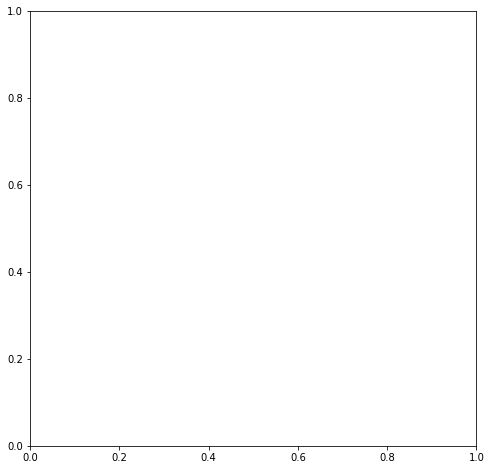

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))
counts = headlines_polarity.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

In [ ]:
headlines_polarity['compound'].iplot(
    kind='hist',
    bins=30,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

Text(0.5, 0, ' Mean Polarity')

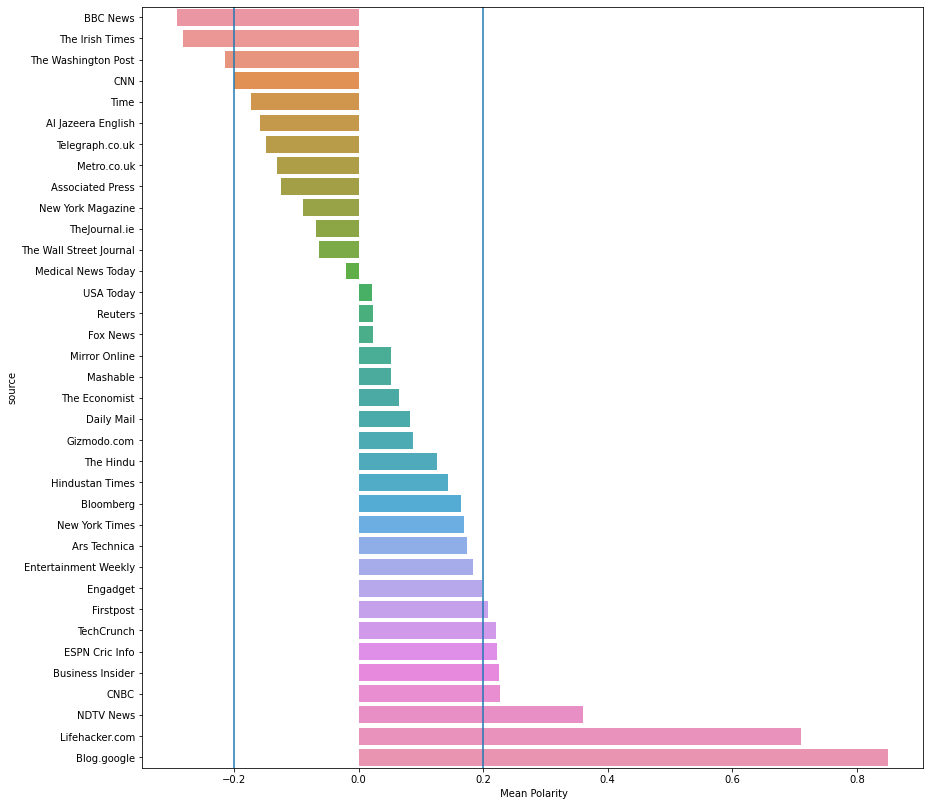

In [ ]:
# Checking out the distribution of the news polarity based on the source of news
df_polarity = pd.read_csv('/content/drive/MyDrive/mean_polarity.csv')
df_polarity = df_polarity.sort_values(['compound']).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(14, 14))
ax = sns.barplot(x='compound', y='source', data=df_polarity)
ax.set_xlabel(' Mean Polarity')
ax.axvline(0.2)
ax.axvline(-0.2)

In [ ]:
# Box Plot for the top news publishers
y0 = headlines_polarity.loc[headlines_polarity['source'] == 'Al Jazeera English']['compound']
y1 = headlines_polarity.loc[headlines_polarity['source'] == 'BBC News']['compound']
y2 = headlines_polarity.loc[headlines_polarity['source'] == 'The Wall Street Journal']['compound']
y3 = headlines_polarity.loc[headlines_polarity['source'] == 'The Washington Post']['compound']
y4 = headlines_polarity.loc[headlines_polarity['source'] == 'Economist.com']['compound']
y5 = headlines_polarity.loc[headlines_polarity['source'] == 'Hindustantimes.com']['compound']

trace0 = go.Box(
    y=y0,
    name = 'Al Jazeera',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'BBC',
    marker = dict(
        color = 'rgb(0, 150, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Wall Street Journal',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Washington Post',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Economist',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Hindustantimes',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Popular News publishers"
)
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Popular News publishers")

In [ ]:
y0 = headlines_polarity.loc[headlines_polarity['source'] == 'Al Jazeera English']['word_count']
y1 = headlines_polarity.loc[headlines_polarity['source'] == 'BBC News']['word_count']
y2 = headlines_polarity.loc[headlines_polarity['source'] == 'The Wall Street Journal']['word_count']
y3 = headlines_polarity.loc[headlines_polarity['source'] == 'The Washington Post']['word_count']
y4 = headlines_polarity.loc[headlines_polarity['source'] == 'Economist.com']['word_count']
y5 = headlines_polarity.loc[headlines_polarity['source'] == 'Hindustantimes.com']['word_count']

trace0 = go.Box(
    y=y0,
    name = 'Al Jazeera',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'BBC',
    marker = dict(
        color = 'rgb(0, 150, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Wall Street Journal',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Washington Post',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Economist',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Hindustantimes',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Headline Length Boxplot of Popular News publishers"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Headline Length Boxplot of Popular News publishers")

KeyError: ignored

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
print(type(stop_words))
specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
#stop_words.extend(specific_words_list )
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)  
    return tokens

<class 'list'>


In [ ]:
# Positive headlines and its distribution 
pos_lines = list(headlines_polarity[headlines_polarity.label == 1].headline)
# extract the headlines that had label =1 which meant it had a positive overall sentiment
pos_tokens =process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

# Now negative headlines
neg_lines = list(headlines_polarity[headlines_polarity.label == -1].headline)
# extract the headlines that had label-1 which meant it had a negative overall sentiment
neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

AttributeError: ignored

In [ ]:
# plotting the word distribution for positive headlines
y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

NameError: ignored

Text(0.5, 0, 'Words')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Word Frequency Distribution (Negative)')

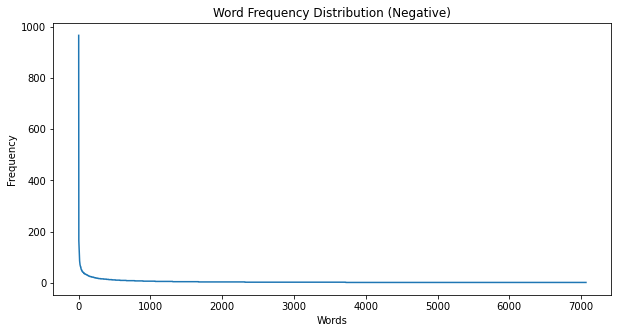

In [ ]:
# Plotting the word frequency distribution for negative headlines
y_val = [x[1] for x in neg_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1499.5, 1199.5, -0.5)

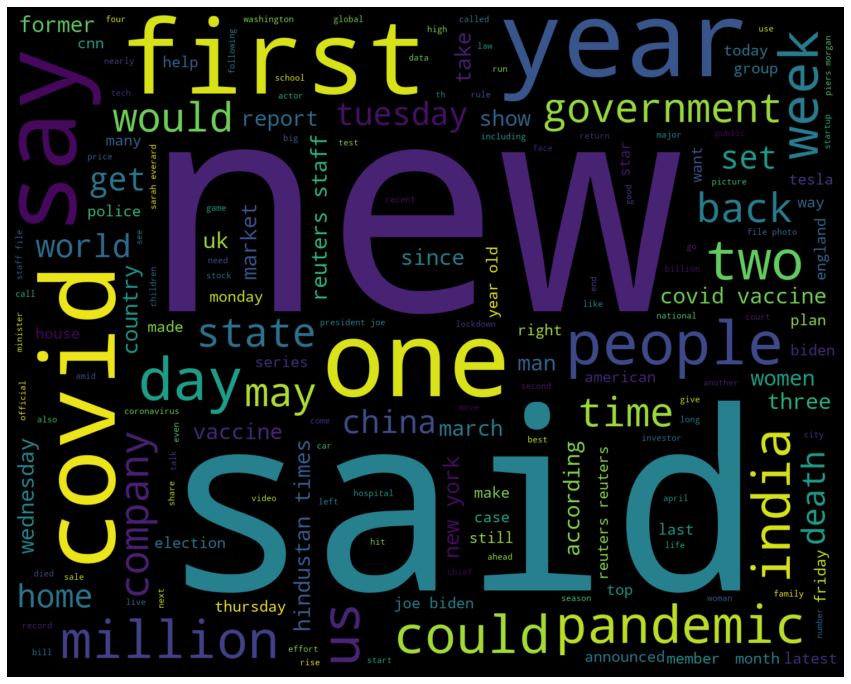

In [ ]:
data=news_articles_df
stop = ["https", "co", "char","chars"] + list(stop_words)
wc = WordCloud(stopwords=stop, max_words=700, margin=10, background_color='black',
scale=3, relative_scaling = 0.4, width=500, height=400,
random_state=1).generate(' '.join(data['combined_text']))
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# news article specific stopwords were downloaded from:  https://github.com/vikasing/news-stopwords.git
# Then, I removed all the news specific stopwords  from my dataframe's column of token 
def remove_stopwords(params):
    with open('/content/drive/MyDrive/sw.csv','r') as my_stopwords:
        stopwords_list = my_stopwords.read()
        new_list = []
        for param in params:
            if str(param) not in stopwords_list:
                new_list.append(param)
            else:
                pass # You can write something to do if the stopword is found
    my_stopwords.close()
    return (new_list)
new_list = remove_stopwords(news_articles_df['tokens'])

In [ ]:
# A genralized function to fetch the top n words from the corpus 
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(news_articles_df['combined_text'], 20)

df1 = pd.DataFrame(common_words, columns = ['Text' , 'count'])

df1.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in the News article before removing stop words')

In [ ]:
common_words = get_top_n_words(new_list, 20)
df2 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in News articles after removing stop words')

In [ ]:
# A genralized function to extact the top n most frequently occuring bigram from the text corpus 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(new_list, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df4.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in News Corpus after removing stop words')

new york 84
reuters staff 83
reuters reuters 82
covid vaccine 81
year old 71
joe biden 65
file photo 60
president joe 55
piers morgan 48
sarah everard 45
staff file 44
united states 41
police officer 41
usa today 41
elon musk 37
covid cases 37
social media 35
meghan markle 35
george floyd 34
th chars 33


In [ ]:
# extracting the parts of specch from the news headlines using textBlob
blob = TextBlob(str(news_articles_df['title']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:5]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for News Headlines')

In [ ]:
news_articles_df = pd.read_csv('/content/drive/MyDrive/news_articles_clean.csv')

In [ ]:
news_articles_df=news_articles_df.drop_duplicates(subset='pub_date', keep="last")
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems
0,Elite Eight takeaways from men's tournament: B...,"USA TODAY, Erick Smith, USA TODAY",USA Today,Baylor has its mojo back after struggling in m...,SportsPulse: Baylor was primed to make the Fin...,2021-03-30,https://www.usatoday.com/story/sports/ncaab/20...,https://www.gannett-cdn.com/presto/2021/03/30/...,elite eight takeaways from men is tournament b...,"['elite', 'eight', 'takeaways', 'men', 'tourna...",elite eight takeaway men tournament bear get g...
1,Protest at Yorkshire school after cartoon of M...,Camilla Turner,Telegraph.co.uk,Batley Grammar School was forced to delay its ...,Police have been called to a school in west Yo...,2021-03-25,https://www.telegraph.co.uk/news/2021/03/25/pr...,https://www.telegraph.co.uk/content/dam/news/2...,protest at yorkshire school after cartoon of m...,"['protest', 'yorkshire', 'school', 'cartoon', ...",protest yorkshire school cartoon muhammed show...
2,Suez Canal: Huge Ever Given container ship is ...,Our Foreign Staff,Telegraph.co.uk,Salvage teams have reportedly partially freed ...,An armada of up to 12 tugboats had been trying...,2021-03-29,https://www.telegraph.co.uk/news/2021/03/29/su...,https://www.telegraph.co.uk/content/dam/news/2...,suez canal huge ever given container ship is p...,"['suez', 'canal', 'huge', 'ever', 'given', 'co...",suez canal huge ever given container ship part...
3,Comedian Lee Hurst suspended from Twitter over...,Katie Storey,Metro.co.uk,Comedian Lee Hurst suspended from Twitter over...,Comedian Lee Hurst suspended from Twitter over...,2021-03-21,https://metro.co.uk/2021/03/21/comedian-lee-hu...,https://metro.co.uk/wp-content/uploads/2021/03...,comedian lee hurst suspended from twitter over...,"['comedian', 'lee', 'hurst', 'suspended', 'twi...",comedian lee hurst suspended twitter greta thu...
4,Thorntons to close all 61 stores in the UK wit...,Elisa Menendez,Metro.co.uk,The chocolate retailer announced it will close...,The chocolate chain will shut all 61 of its UK...,2021-03-15,https://metro.co.uk/2021/03/15/thorntons-to-pe...,https://metro.co.uk/wp-content/uploads/2021/03...,thorntons to close all stores in the uk with ...,"['thorntons', 'close', 'stores', 'uk', 'jobs',...",thornton close store uk job affected chocolate...


In [ ]:
# Checking the combined data once again to ensure no null value is present
print(news_articles_df.isnull().sum())
news_articles_df.dropna(inplace=True)
print(news_articles_df.shape)
print(news_articles_df.isnull().sum())

title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64
(31, 11)
title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64


In [ ]:
# calculating the polarity of the news articles 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in news_articles_df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [ ]:
# Creating a new dataframe of only the polarity score, the headline and the source of the news 
headlines_polaritys = pd.DataFrame.from_records(results)
temp = []
for line in news_articles_df['source'] :
    temp.append(line)
headlines_polaritys['source'] =temp

In [ ]:
# categorize news as positive or negative based on the compound score obtained
headlines_polaritys['label'] = 0
# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polaritys.loc[headlines_polaritys['compound'] > 0.2, 'label'] = 1
# if the compound score is below 0.2 then it is considered negative 
headlines_polaritys.loc[headlines_polaritys['compound'] < -0.2, 'label'] = -1
# word count of news headlines is calculated
headlines_polaritys['word_count'] = headlines_polaritys['headline'].apply(lambda x: len(str(x).split()))

In [ ]:
headlines_polaritys.head()

,neg,neu,pos,compound,headline,source,label,word_count
0,0.000,0.824,0.176,0.8176,elite eight takeaway men tournament bear get g...,USA Today,1,37
1,0.167,0.833,0.000,-0.6124,protest yorkshire school cartoon muhammed show...,Telegraph.co.uk,-1,27
2,0.065,0.774,0.161,0.4588,suez canal huge ever given container ship part...,Telegraph.co.uk,1,27
3,0.126,0.510,0.364,0.8633,comedian lee hurst suspended twitter greta thu...,Metro.co.uk,1,35
4,0.065,0.935,0.000,-0.1531,thornton close store uk job affected chocolate...,Metro.co.uk,0,24


In [ ]:
df_merged=headlines_polarity.merge(news_articles_df)
df_merged.head()

,neg,neu,pos,compound,headline,source,title,author,description,content,pub_date,url,photo_url,combined_text,tokens,lems
0,0.000,0.824,0.176,0.8176,elite eight takeaway men tournament bear get g...,USA Today,Elite Eight takeaways from men's tournament: B...,"USA TODAY, Erick Smith, USA TODAY",Baylor has its mojo back after struggling in m...,SportsPulse: Baylor was primed to make the Fin...,2021-03-30,https://www.usatoday.com/story/sports/ncaab/20...,https://www.gannett-cdn.com/presto/2021/03/30/...,elite eight takeaways from men is tournament b...,"['elite', 'eight', 'takeaways', 'men', 'tourna...",elite eight takeaway men tournament bear get g...
1,0.167,0.833,0.000,-0.6124,protest yorkshire school cartoon muhammed show...,Telegraph.co.uk,Protest at Yorkshire school after cartoon of M...,Camilla Turner,Batley Grammar School was forced to delay its ...,Police have been called to a school in west Yo...,2021-03-25,https://www.telegraph.co.uk/news/2021/03/25/pr...,https://www.telegraph.co.uk/content/dam/news/2...,protest at yorkshire school after cartoon of m...,"['protest', 'yorkshire', 'school', 'cartoon', ...",protest yorkshire school cartoon muhammed show...
2,0.167,0.833,0.000,-0.6124,protest yorkshire school cartoon muhammed show...,Telegraph.co.uk,Suez Canal: Huge Ever Given container ship is ...,Our Foreign Staff,Salvage teams have reportedly partially freed ...,An armada of up to 12 tugboats had been trying...,2021-03-29,https://www.telegraph.co.uk/news/2021/03/29/su...,https://www.telegraph.co.uk/content/dam/news/2...,suez canal huge ever given container ship is p...,"['suez', 'canal', 'huge', 'ever', 'given', 'co...",suez canal huge ever given container ship part...
3,0.065,0.774,0.161,0.4588,suez canal huge ever given container ship part...,Telegraph.co.uk,Protest at Yorkshire school after cartoon of M...,Camilla Turner,Batley Grammar School was forced to delay its ...,Police have been called to a school in west Yo...,2021-03-25,https://www.telegraph.co.uk/news/2021/03/25/pr...,https://www.telegraph.co.uk/content/dam/news/2...,protest at yorkshire school after cartoon of m...,"['protest', 'yorkshire', 'school', 'cartoon', ...",protest yorkshire school cartoon muhammed show...
4,0.065,0.774,0.161,0.4588,suez canal huge ever given container ship part...,Telegraph.co.uk,Suez Canal: Huge Ever Given container ship is ...,Our Foreign Staff,Salvage teams have reportedly partially freed ...,An armada of up to 12 tugboats had been trying...,2021-03-29,https://www.telegraph.co.uk/news/2021/03/29/su...,https://www.telegraph.co.uk/content/dam/news/2...,suez canal huge ever given container ship is p...,"['suez', 'canal', 'huge', 'ever', 'given', 'co...",suez canal huge ever given container ship part...


In [ ]:
df_merged=df_merged.drop_duplicates(subset='pub_date', keep="last")
df_merged.head()

NameError: ignored

Text(0, 0.5, 'Normalized stock close')

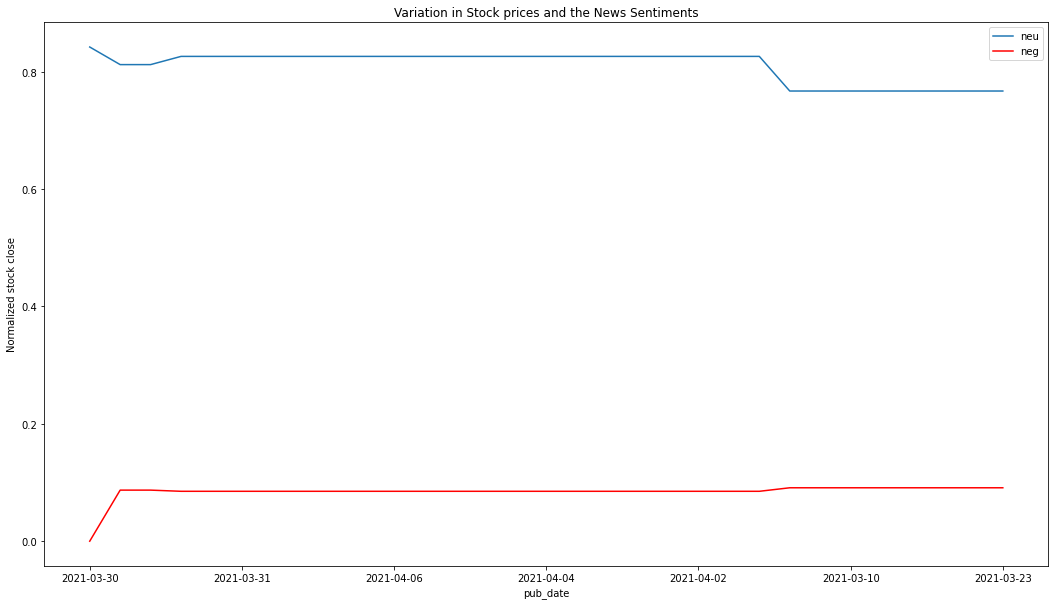

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# gca stands for 'get current axis'
ax = plt.gca()
df_merged.plot(kind='line',x='pub_date',y='neu',ax=ax, figsize=(18,10))
ax.set_ylabel("Normalized stock close")
df_merged.plot(kind='line',x='pub_date',y='neg', color='red',title='Variation in Stock prices and the News Sentiments', ax=ax, figsize=(18,10))
#plt.show()

In [ ]:
stock_data = pd.read_csv('/content/drive/MyDrive/stktsla.csv')

In [ ]:
# stock news articles
df_merged['date'] = pd.to_datetime(df_merged['pub_date']).apply(lambda x: x.date())
# stock market data 
stock_data['date'] = pd.to_datetime(stock_data['day']).apply(lambda x: x.date())

In [ ]:
df_mergeds=stock_data.merge(df_merged,on='date')
df_mergeds.head()

,open,high,low,close,volume,adjusted,day,company,date,neg,neu,pos,compound,headline,source,title,author,description,content,pub_date,url,photo_url,combined_text,tokens,lems
0,700.299988,717.849976,655.059998,668.059998,60605700,668.059998,2021-03-10,TSLA,2021-03-10,0.070,0.930,0.000,-0.3412,pier morgan stay itv despite quitting role gmb...,Mirror Online,Hartson tells Celtic to snub giving Rangers a ...,mirrornews@mirror.co.uk (Matthew Cooper),Former Celtic striker John Hartson believes th...,John Hartson believes his former club Celtic s...,2021-03-10,https://www.mirror.co.uk/sport/football/news/r...,https://i2-prod.dailystar.co.uk/incoming/artic...,hartson tells celtic to snub giving rangers a ...,"['hartson', 'tells', 'celtic', 'snub', 'giving...",hartson tell celtic snub giving ranger guard h...
1,700.299988,717.849976,655.059998,668.059998,60605700,668.059998,2021-03-10,TSLA,2021-03-10,0.000,0.721,0.279,0.8910,david moyes hint jesse lingard west ham transf...,Mirror Online,Hartson tells Celtic to snub giving Rangers a ...,mirrornews@mirror.co.uk (Matthew Cooper),Former Celtic striker John Hartson believes th...,John Hartson believes his former club Celtic s...,2021-03-10,https://www.mirror.co.uk/sport/football/news/r...,https://i2-prod.dailystar.co.uk/incoming/artic...,hartson tells celtic to snub giving rangers a ...,"['hartson', 'tells', 'celtic', 'snub', 'giving...",hartson tell celtic snub giving ranger guard h...
2,700.299988,717.849976,655.059998,668.059998,60605700,668.059998,2021-03-10,TSLA,2021-03-10,0.062,0.639,0.300,0.8957,hartson tell celtic snub giving ranger guard h...,Mirror Online,Hartson tells Celtic to snub giving Rangers a ...,mirrornews@mirror.co.uk (Matthew Cooper),Former Celtic striker John Hartson believes th...,John Hartson believes his former club Celtic s...,2021-03-10,https://www.mirror.co.uk/sport/football/news/r...,https://i2-prod.dailystar.co.uk/incoming/artic...,hartson tells celtic to snub giving rangers a ...,"['hartson', 'tells', 'celtic', 'snub', 'giving...",hartson tell celtic snub giving ranger guard h...
3,700.299988,717.849976,655.059998,668.059998,60605700,668.059998,2021-03-10,TSLA,2021-03-10,0.288,0.712,0.000,-0.8591,man kept losing weight stopping diet diagnosed...,Mirror Online,Hartson tells Celtic to snub giving Rangers a ...,mirrornews@mirror.co.uk (Matthew Cooper),Former Celtic striker John Hartson believes th...,John Hartson believes his former club Celtic s...,2021-03-10,https://www.mirror.co.uk/sport/football/news/r...,https://i2-prod.dailystar.co.uk/incoming/artic...,hartson tells celtic to snub giving rangers a ...,"['hartson', 'tells', 'celtic', 'snub', 'giving...",hartson tell celtic snub giving ranger guard h...
4,700.299988,717.849976,655.059998,668.059998,60605700,668.059998,2021-03-10,TSLA,2021-03-10,0.178,0.587,0.235,0.3182,mikel arteta admits gabriel martinelli recent ...,Mirror Online,Hartson tells Celtic to snub giving Rangers a ...,mirrornews@mirror.co.uk (Matthew Cooper),Former Celtic striker John Hartson believes th...,John Hartson believes his former club Celtic s...,2021-03-10,https://www.mirror.co.uk/sport/football/news/r...,https://i2-prod.dailystar.co.uk/incoming/artic...,hartson tells celtic to snub giving rangers a ...,"['hartson', 'tells', 'celtic', 'snub', 'giving...",hartson tell celtic snub giving ranger guard h...


In [ ]:
df_mergeds['combined_text'] = df_mergeds['title'].map(str) +" "+ df_mergeds['content']+" "+ df_mergeds['description'].map(str)

In [ ]:
# keeping only the essential columns in the dataframe
df_mergeds=df_mergeds[['date','close','neg','neu','pos','compound']]
df_mergeds.head()

,date,close,neg,neu,pos,compound
0,2021-03-10,668.059998,0.070,0.930,0.000,-0.3412
1,2021-03-10,668.059998,0.000,0.721,0.279,0.8910
2,2021-03-10,668.059998,0.062,0.639,0.300,0.8957
3,2021-03-10,668.059998,0.288,0.712,0.000,-0.8591
4,2021-03-10,668.059998,0.178,0.587,0.235,0.3182


In [ ]:
df_mergeds.to_csv('/content/drive/MyDrive/df_mergeds_Tesla.csv', index = False)

In [ ]:
df_mergeds=df_mergeds.drop_duplicates(subset='date', keep="last")
df_mergeds.head()

,date,close,combined_text,neg,neu,pos,compound
11869,2021-03-10,668.059998,Hartson tells Celtic to snub giving Rangers a ...,0.091,0.767,0.142,0.1779
20939,2021-03-11,699.599976,Sarah Everard: Green party peer suggests 6pm c...,0.085,0.826,0.088,0.0258
34822,2021-03-12,693.729980,Piers Morgan to stay at ITV despite quitting h...,0.091,0.767,0.142,0.1779
42619,2021-03-15,707.940002,Thorntons to close all 61 stores in the UK wit...,0.085,0.826,0.088,0.0258
70516,2021-03-16,676.880005,Man who kept losing weight after stopping diet...,0.091,0.767,0.142,0.1779


In [ ]:
df_mergeds.to_csv('/content/drive/MyDrive/Tesla.csv', index = False)

In [ ]:
# Min-Max Normalization 
from sklearn import preprocessing
# Create x, where x the 'scores' column's values as floats
x = df_mergeds[['close']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
# adding the new column to our dataframe
df_mergeds['normal_close']= x_scaled

Text(0, 0.5, 'Normalized stock close')

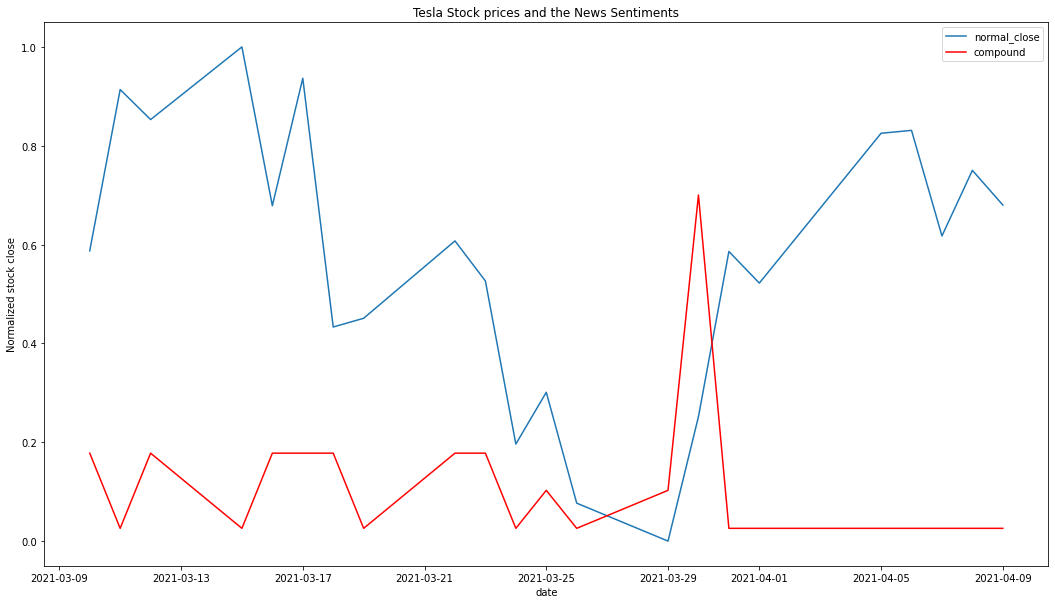

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# gca stands for 'get current axis'
ax = plt.gca()
df_mergeds.plot(kind='line',x='date',y='normal_close',ax=ax, figsize=(18,10))
ax.set_ylabel("Normalized stock close")
df_mergeds.plot(kind='line',x='date',y='compound', color='red',title='Tesla Stock prices and the News Sentiments', ax=ax, figsize=(18,10))
#plt.show()

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
# calculate the Pearsons and Spearmans correlation between two variables
# prepare data
data1 = df_mergeds['compound']  
data2 = df_mergeds['normal_close'] 
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
# calculate Spearmans's correlation (non gaussian distribution)
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: -0.218
Spearmans correlation: -0.130
